In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MEMORY AND TIME COMPLEXITY 

In [25]:
df1 = pd.read_csv('inference_results/lbanp_0inference_results.csv')
#df2 = pd.read_csv('inference_results/lbanp_1inference_results.csv') #64 latents
df3 = pd.read_csv('inference_results/lbanp_2inference_results.csv')
df4 = pd.read_csv('inference_results/isanp_3inference_results.csv')
#df5 = pd.read_csv('inference_results/isanp_4inference_results.csv') #64
df6 = pd.read_csv('inference_results/isanp_5inference_results.csv')
df7 = pd.read_csv('inference_results/isanp2_6inference_results.csv')
#df8 = pd.read_csv('inference_results/isanp2_7inference_results.csv') #64
df9 = pd.read_csv('inference_results/isanp2_8inference_results.csv')
df10= pd.read_csv('inference_results/tnpd1_inference_results.csv')
df11= pd.read_csv('inference_results/tnpd2_inference_results.csv')
df11=df11[df11['Context Size']<1500]
#df12=pd.read_csv('isanp2_6inference_results2.csv') #just to corroborate isanp2 results

In [26]:
#df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True) 
df = pd.concat([df1, df3, df4, df6, df7, df9, df10, df11], ignore_index=True)

In [27]:
df.tail()

,Model,Context Size,Memory Used (MB),Inference Time (ms)
47,ISANPv2(128),3000,4726.0,2800.814160
48,TNPD,10,2002.0,181.618344
49,TNPD,150,2608.0,183.337003
50,TNPD,500,4438.0,249.028408
51,TNPD,1000,7650.0,763.315409


In [28]:
# Assuming df is your DataFrame
df['Model'] = df['Model'].replace('ISANPv2(8)', 'ISANP2(8)')
df['Model'] = df['Model'].replace('ISANPv2(128)', 'ISANP2(128)')


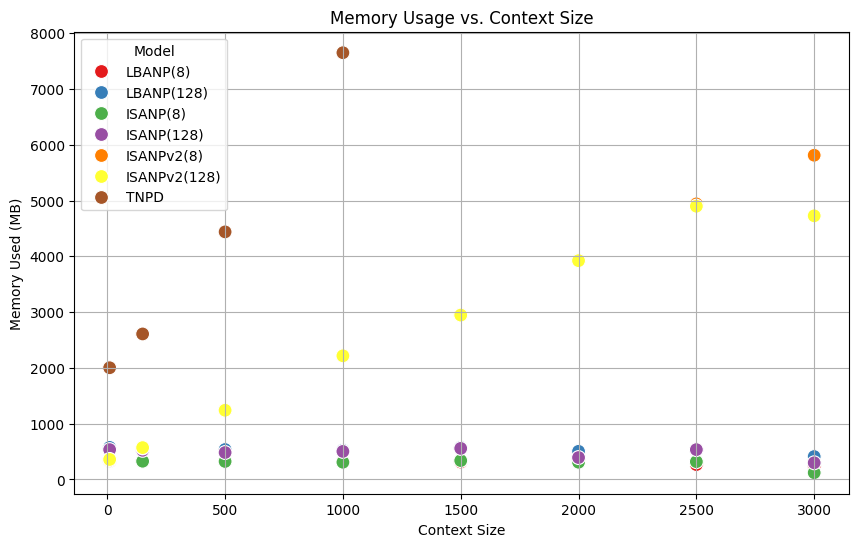

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Context Size', y='Memory Used (MB)', hue='Model', palette='Set1', s=100)
plt.title('Memory Usage vs. Context Size')
plt.xlabel('Context Size')
plt.ylabel('Memory Used (MB)')
plt.grid(True)
plt.legend(title='Model')
plt.show()

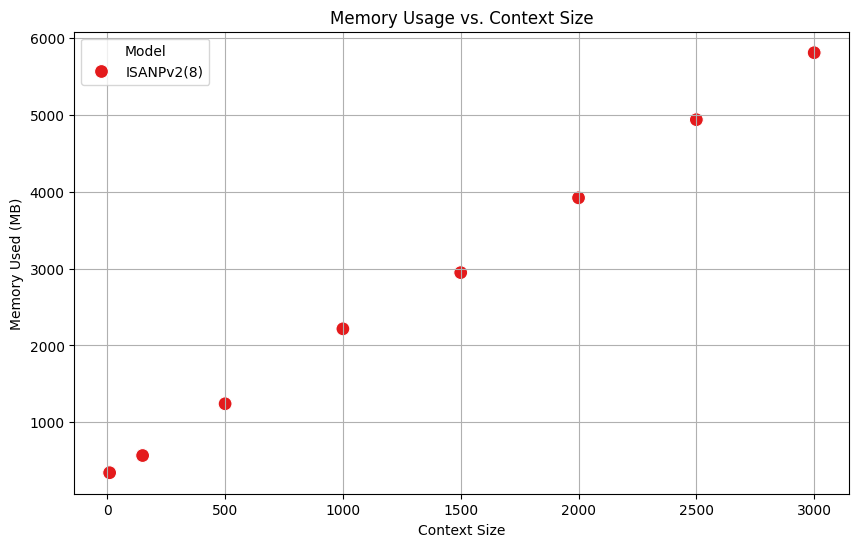

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['Model']=='ISANPv2(8)'], x='Context Size', y='Memory Used (MB)', hue='Model', palette='Set1', s=100)
plt.title('Memory Usage vs. Context Size')
plt.xlabel('Context Size')
plt.ylabel('Memory Used (MB)')
plt.grid(True)
plt.legend(title='Model')
plt.show()

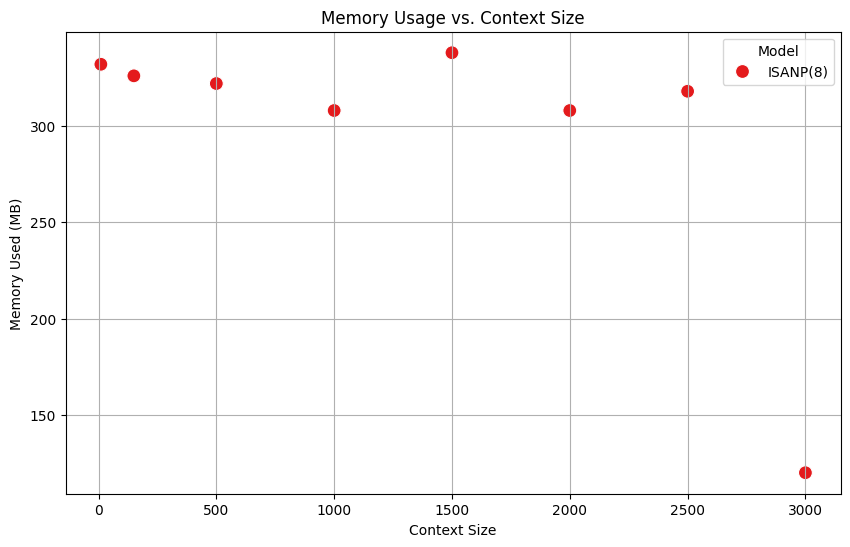

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['Model']=='ISANP(8)'], x='Context Size', y='Memory Used (MB)', hue='Model', palette='Set1', s=100)
plt.title('Memory Usage vs. Context Size')
plt.xlabel('Context Size')
plt.ylabel('Memory Used (MB)')
plt.grid(True)
plt.legend(title='Model')
plt.show()

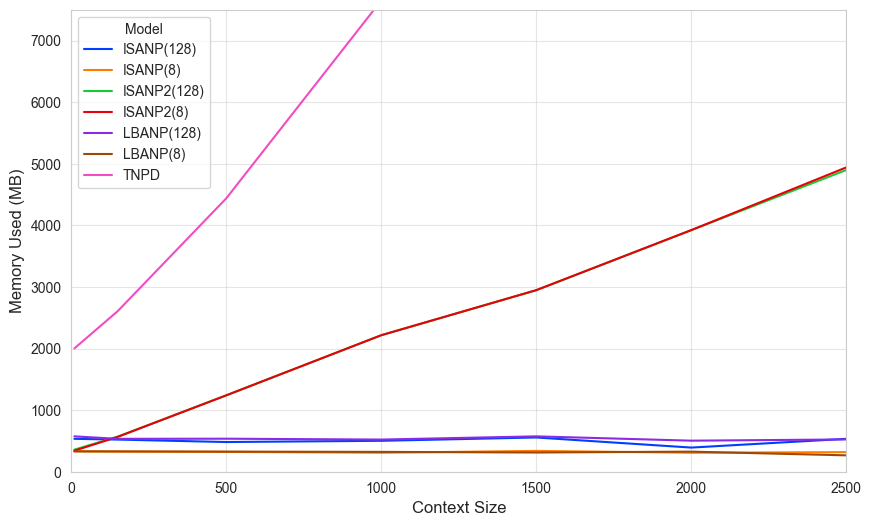

In [30]:
agg_df = df.groupby(['Model', 'Context Size']).mean().reset_index()

sns.set_style("whitegrid")

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df,x='Context Size', y='Memory Used (MB)', hue='Model', palette='bright',
            style='Model',
            dashes=False, markersize=10, alpha=1)
#plt.title('Empirical Memory Complexity', fontsize=14)
plt.xlabel('Context Size', fontsize=12)
plt.ylabel('Memory Used (MB)', fontsize=12)
plt.grid(True,alpha=0.5)
plt.ylim(0, 7500)  # Set the lower and upper limits for the y-axis
plt.xlim(0, 2500)  # Set the lower and upper limits for the y-axis
plt.legend(title='Model', fontsize=10)
plt.show()

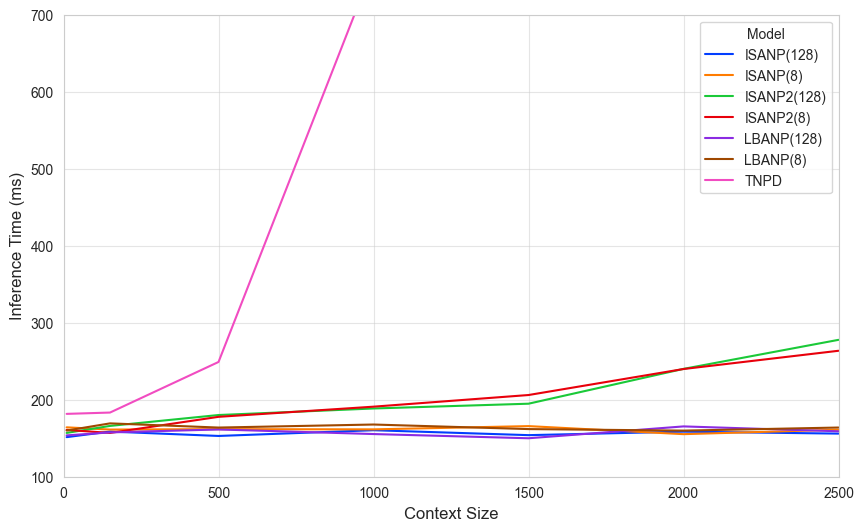

In [31]:
sns.set_style("whitegrid")

#"darkgrid", "white", "dark", and "ticks", "whitegrid"

agg_df = df[df['Context Size']<3000].groupby(['Model', 'Context Size']).mean().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=agg_df, x='Context Size', y='Inference Time (ms)', hue='Model', palette='bright',
            style='Model',
            dashes=False, markersize=10, alpha=1)
#plt.title('Empirical Time Complexity', fontsize=14)
plt.xlabel('Context Size', fontsize=12)
plt.ylabel('Inference Time (ms)', fontsize=12)
plt.grid(True,alpha=0.5)
plt.ylim(100, 700)  # Set the lower and upper limits for the y-axis
plt.xlim(0, 2500)  # Set the lower and upper limits for the y-axis
plt.legend(title='Model', fontsize=10)
plt.show()

# LIKELIHOOD vs LATENTS (RBF)

## During Training
Average of two training executions with different seeds by model with the rbf kernel.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
data = {
    'L': [8, 16, 32, 64, 128, 256],
    'CANP':[0.79,0.79,0.79,0.79,0.79,0.79],
    'LBANP': [1.21, 1.26, 1.25, 1.27, 1.19, 0.82],
    'ISANP': [1.29, 1.35, 1.38, 1.33, 1.36, 1.33],
    'ISANP2': [1.22, 1.19, 1.19, 1.14, 1.21, 1.16],
    'TNPD':[1.39,1.39,1.39,1.39,1.39,1.39]
}

dfl = pd.DataFrame(data)
dfl

,L,CANP,LBANP,ISANP,ISANP2,TNPD
0,8,0.79,1.21,1.29,1.22,1.39
1,16,0.79,1.26,1.35,1.19,1.39
2,32,0.79,1.25,1.38,1.19,1.39
3,64,0.79,1.27,1.33,1.14,1.39
4,128,0.79,1.19,1.36,1.21,1.39
5,256,0.79,0.82,1.33,1.16,1.39


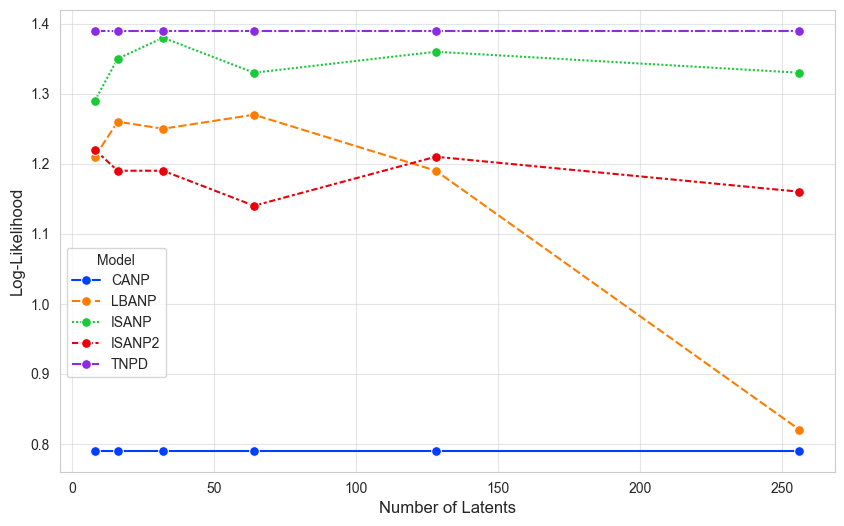

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Melt DataFrame for easier plotting
df_melted = dfl.melt(id_vars='L', var_name='Model', value_name='Likelihood')

                    
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='L', y='Likelihood', hue='Model', marker='o',
             palette='bright',
                    style='Model',
                    dashes=True, markersize=7, 
                     alpha=1)
#plt.title('Performance by Latents', fontsize=14)
plt.xlabel('Number of Latents', fontsize=12)
plt.ylabel('Log-Likelihood', fontsize=12)
plt.grid(True, alpha=0.5)
plt.legend(title='Model', fontsize=10, loc='upper left', bbox_to_anchor=(0.0, 0.5))
plt.show()


## During Inference
Average of 5 inference executions with different validation seeds, using models trained with seed 0 and the rbf kernel.

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
# Create DataFrame
data = {
    'L': [8, 16, 32, 64, 128, 256],
    'CANP':[0.78,0.78,0.78,0.78,0.78,0.78],
    'LBANP': [1.19, 1.24, 1.23, 1.26, 1.24, 0.81],
    #'LBANP_STD': [0.02, 0.02, 0.02, 0.01, 0.02, 0.01],
    'ISANP': [1.26, 1.34, 1.37, 1.32, 1.34, 1.34],
    #'ISANP_STD': [0.02, 0.02, 0.02, 0.02, 0.02, 0.02],
    'ISANP2': [1.20, 1.17, 1.17, 1.12, 1.19, 1.15],
    #'ISANPv2_STD': [0.01, 0.01, 0.01, 0.01, 0.01, 0.02],
    
    'TNPD':[1.38,1.38,1.38,1.38,1.38,1.38]
}

df = pd.DataFrame(data)


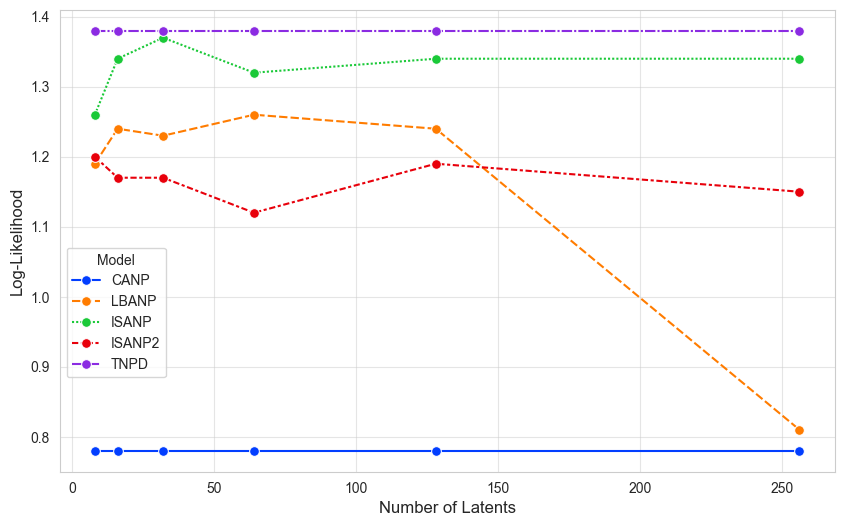

In [39]:
# Melt DataFrame for easier plotting
df_melted = df.melt(id_vars='L', var_name='Model', value_name='Likelihood')

                    
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='L', y='Likelihood', hue='Model', marker='o',
             palette='bright',
                    style='Model',
                    dashes=True, markersize=7, 
                     alpha=1)
#plt.title('Performance by Latents', fontsize=14)
plt.xlabel('Number of Latents', fontsize=12)
plt.ylabel('Log-Likelihood', fontsize=12)
plt.grid(True, alpha=0.5)
plt.legend(title='Model', fontsize=10, loc='upper left', bbox_to_anchor=(0.0, 0.5))
plt.show()